In [1]:
import pandas as pd

#데이터 로드
train_df = pd.read_csv('./data./train.csv')
test_df = pd.read_csv('./data./test.csv')

## EDA

In [3]:
import pandas as pd
import sweetviz as sv

# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')
sv.config_parser.read_string("[General]\nuse_cjk_font=1")

df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

compare_report = sv.compare([df_train,'Train'],[df_test,'Test'],target_feat='가격')
compare_report.show_html(r'./image/EDA_Report.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)  


Report ./image/EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   가격      71 non-null     int64  
 1   년식      71 non-null     int64  
 2   종류      71 non-null     object 
 3   연비      71 non-null     float64
 4   마력      71 non-null     int64  
 5   토크      71 non-null     float64
 6   연료      71 non-null     object 
 7   하이브리드   71 non-null     int64  
 8   배기량     71 non-null     int64  
 9   중량      71 non-null     int64  
 10  변속기     71 non-null     object 
dtypes: float64(2), int64(6), object(3)
memory usage: 6.2+ KB


In [14]:
df_test.head()

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1915,2015,대형,6.8,159,23.0,LPG,0,2359,1935,수동
1,1164,2012,소형,13.3,108,13.9,가솔린,0,1396,1035,자동
2,2817,2015,중형,14.4,184,41.0,디젤,0,1995,1792,자동
3,2160,2015,대형,10.9,175,46.0,디젤,0,2497,2210,수동
4,1915,2015,대형,6.4,159,23.0,LPG,0,2359,1935,자동


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   가격      31 non-null     int64  
 1   년식      31 non-null     int64  
 2   종류      31 non-null     object 
 3   연비      31 non-null     float64
 4   마력      31 non-null     int64  
 5   토크      31 non-null     float64
 6   연료      31 non-null     object 
 7   하이브리드   31 non-null     int64  
 8   배기량     31 non-null     int64  
 9   중량      31 non-null     int64  
 10  변속기     31 non-null     object 
dtypes: float64(2), int64(6), object(3)
memory usage: 2.8+ KB


In [6]:
df_train.describe()

,가격,년식,연비,마력,토크,하이브리드,배기량,중량
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,2488.492958,2014.436620,12.361972,175.647887,29.443662,0.042254,2152.450704,1580.563380
std,1456.797632,1.167811,3.154333,61.207165,12.143943,0.202599,687.918699,367.027859
min,1104.000000,2011.000000,6.300000,100.000000,13.600000,0.000000,1368.000000,1035.000000
25%,1620.000000,2015.000000,9.950000,136.000000,18.150000,0.000000,1591.000000,1261.000000
50%,2110.000000,2015.000000,12.400000,166.000000,27.000000,0.000000,1999.000000,1615.000000
75%,3044.500000,2015.000000,14.200000,200.000000,41.000000,0.000000,2428.000000,1903.000000
max,11150.000000,2015.000000,19.000000,416.000000,52.000000,1.000000,5038.000000,2210.000000


In [7]:
df_train.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
66    False
67    False
68    False
69    False
70    False
Length: 71, dtype: bool

In [8]:
df_train.isnull().sum()

가격       0
년식       0
종류       0
연비       0
마력       0
토크       0
연료       0
하이브리드    0
배기량      0
중량       0
변속기      0
dtype: int64

In [9]:
df_test.isnull().sum()

가격       0
년식       0
종류       0
연비       0
마력       0
토크       0
연료       0
하이브리드    0
배기량      0
중량       0
변속기      0
dtype: int64

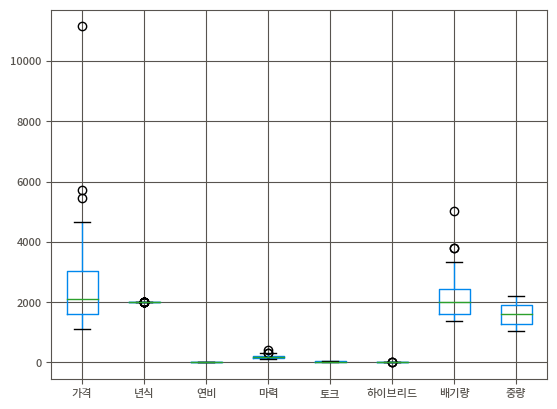

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

df_train.boxplot()
plt.show()

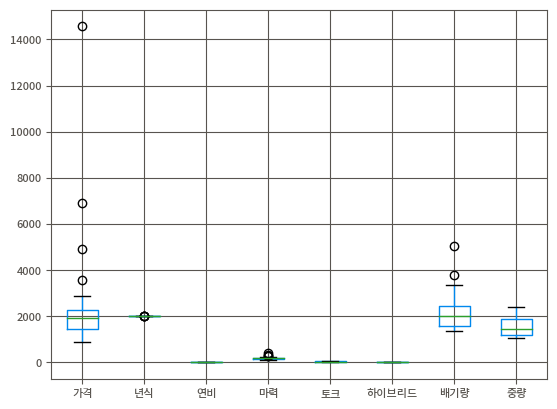

In [12]:
df_test.boxplot()
plt.show()

<Axes: >

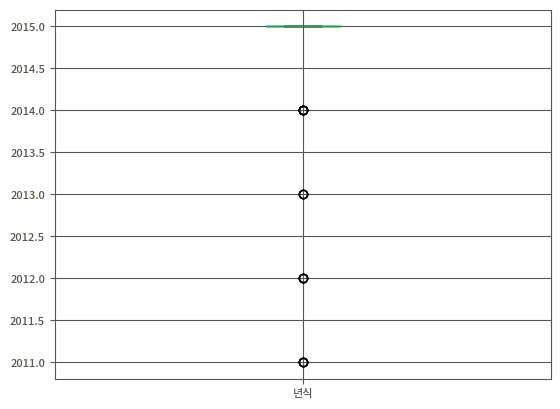

In [16]:
train_df[['년식']].boxplot() #범주형이어서 boxplot으로 분석하는 의미가 없다.

<Axes: >

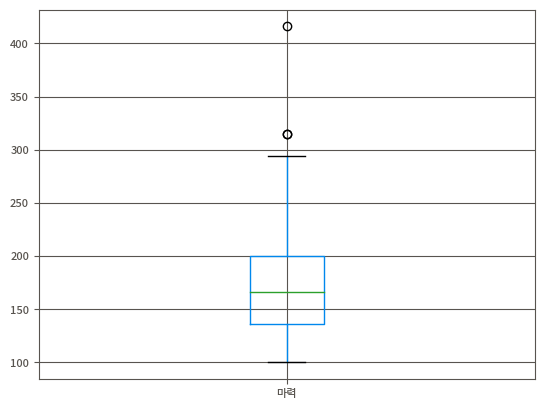

In [17]:
train_df[['마력']].boxplot()

<Axes: >

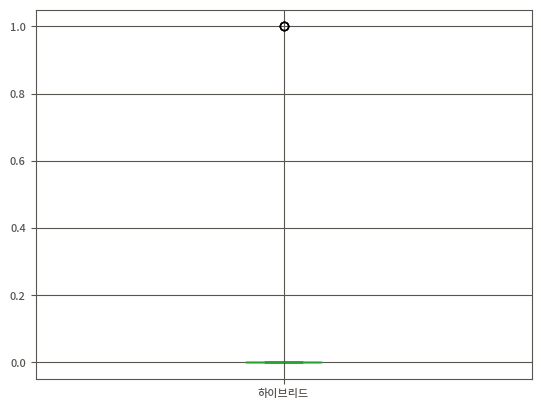

In [18]:
train_df[['하이브리드']].boxplot()

```
1.결측치 : 없음 
2.중복값 : Train에 1개
3.이상치 : 가격 하나 --> 적은 수 이므로 잠정적으로 수용하는 것으로 판단
4.인코딩: 3개씩 (종류, 연료, 변속기), 연식, 하이브리드(숫자이지만 범주형으로 파악됨)
5. Feature와 Label(가격)의 관계성 유무: sweetviz의 heatmap 분석: 관계성이 있다. 마력과 배기량에 따라 가격이 좌지우지될 가능성 있다.
6.스케일링: 아직 모름
```

In [21]:
# 가공: 중복값 처리

train_df[train_df.duplicated()]

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
16,1960,2015,대형,11.4,175,46.0,디젤,0,2497,1990,수동


In [22]:
# 중복 제거 전
len(train_df)

71

In [23]:
train_df.drop_duplicates()

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1885,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2190,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,1135,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,1645,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,1960,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
...,...,...,...,...,...,...,...,...,...,...,...
66,3802,2015,중형,8.5,290,34.8,가솔린,0,3342,1901,자동
67,1270,2012,소형,13.3,108,13.9,가솔린,0,1396,1040,자동
68,2430,2015,준중형,12.8,186,41.0,디젤,0,1995,1665,자동
69,2870,2015,중형,17.7,156,19.3,가솔린,1,1999,1585,자동


In [25]:
# 중복 제거 후
train_df = train_df.drop_duplicates()

In [26]:
len(train_df)

70

In [29]:
# 1차 가공 후 데이터 저장
train_df.to_csv('./data/train_pre.csv', index=False) #인덱스 빼고 저장

In [30]:
pd.read_csv('./data/train_pre.csv')

,가격,년식,종류,연비,마력,토크,연료,하이브리드,배기량,중량,변속기
0,1885,2015,준중형,11.8,172,21.0,가솔린,0,1999,1300,자동
1,2190,2015,준중형,12.3,204,27.0,가솔린,0,1591,1300,자동
2,1135,2015,소형,15.0,100,13.6,가솔린,0,1368,1035,수동
3,1645,2014,소형,14.0,140,17.0,가솔린,0,1591,1090,자동
4,1960,2015,대형,9.6,175,46.0,디젤,0,2497,1990,자동
...,...,...,...,...,...,...,...,...,...,...,...
65,3802,2015,중형,8.5,290,34.8,가솔린,0,3342,1901,자동
66,1270,2012,소형,13.3,108,13.9,가솔린,0,1396,1040,자동
67,2430,2015,준중형,12.8,186,41.0,디젤,0,1995,1665,자동
68,2870,2015,중형,17.7,156,19.3,가솔린,1,1999,1585,자동
